# Bike Sharing Assignment


## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 
 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## 1. Reading and understanding Data

In [1]:
# import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Read the data from csv file

Bike_data = pd.read_csv("C:/Users/suvandhana/Downloads/day.csv")
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# number of rows and columns
Bike_data.shape

(730, 16)

In [5]:
#Check the datatypes of all the columns of the dataframe
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# describe about numeric columns
Bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Check the number of null values in the columns
Bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Visualisation for given data

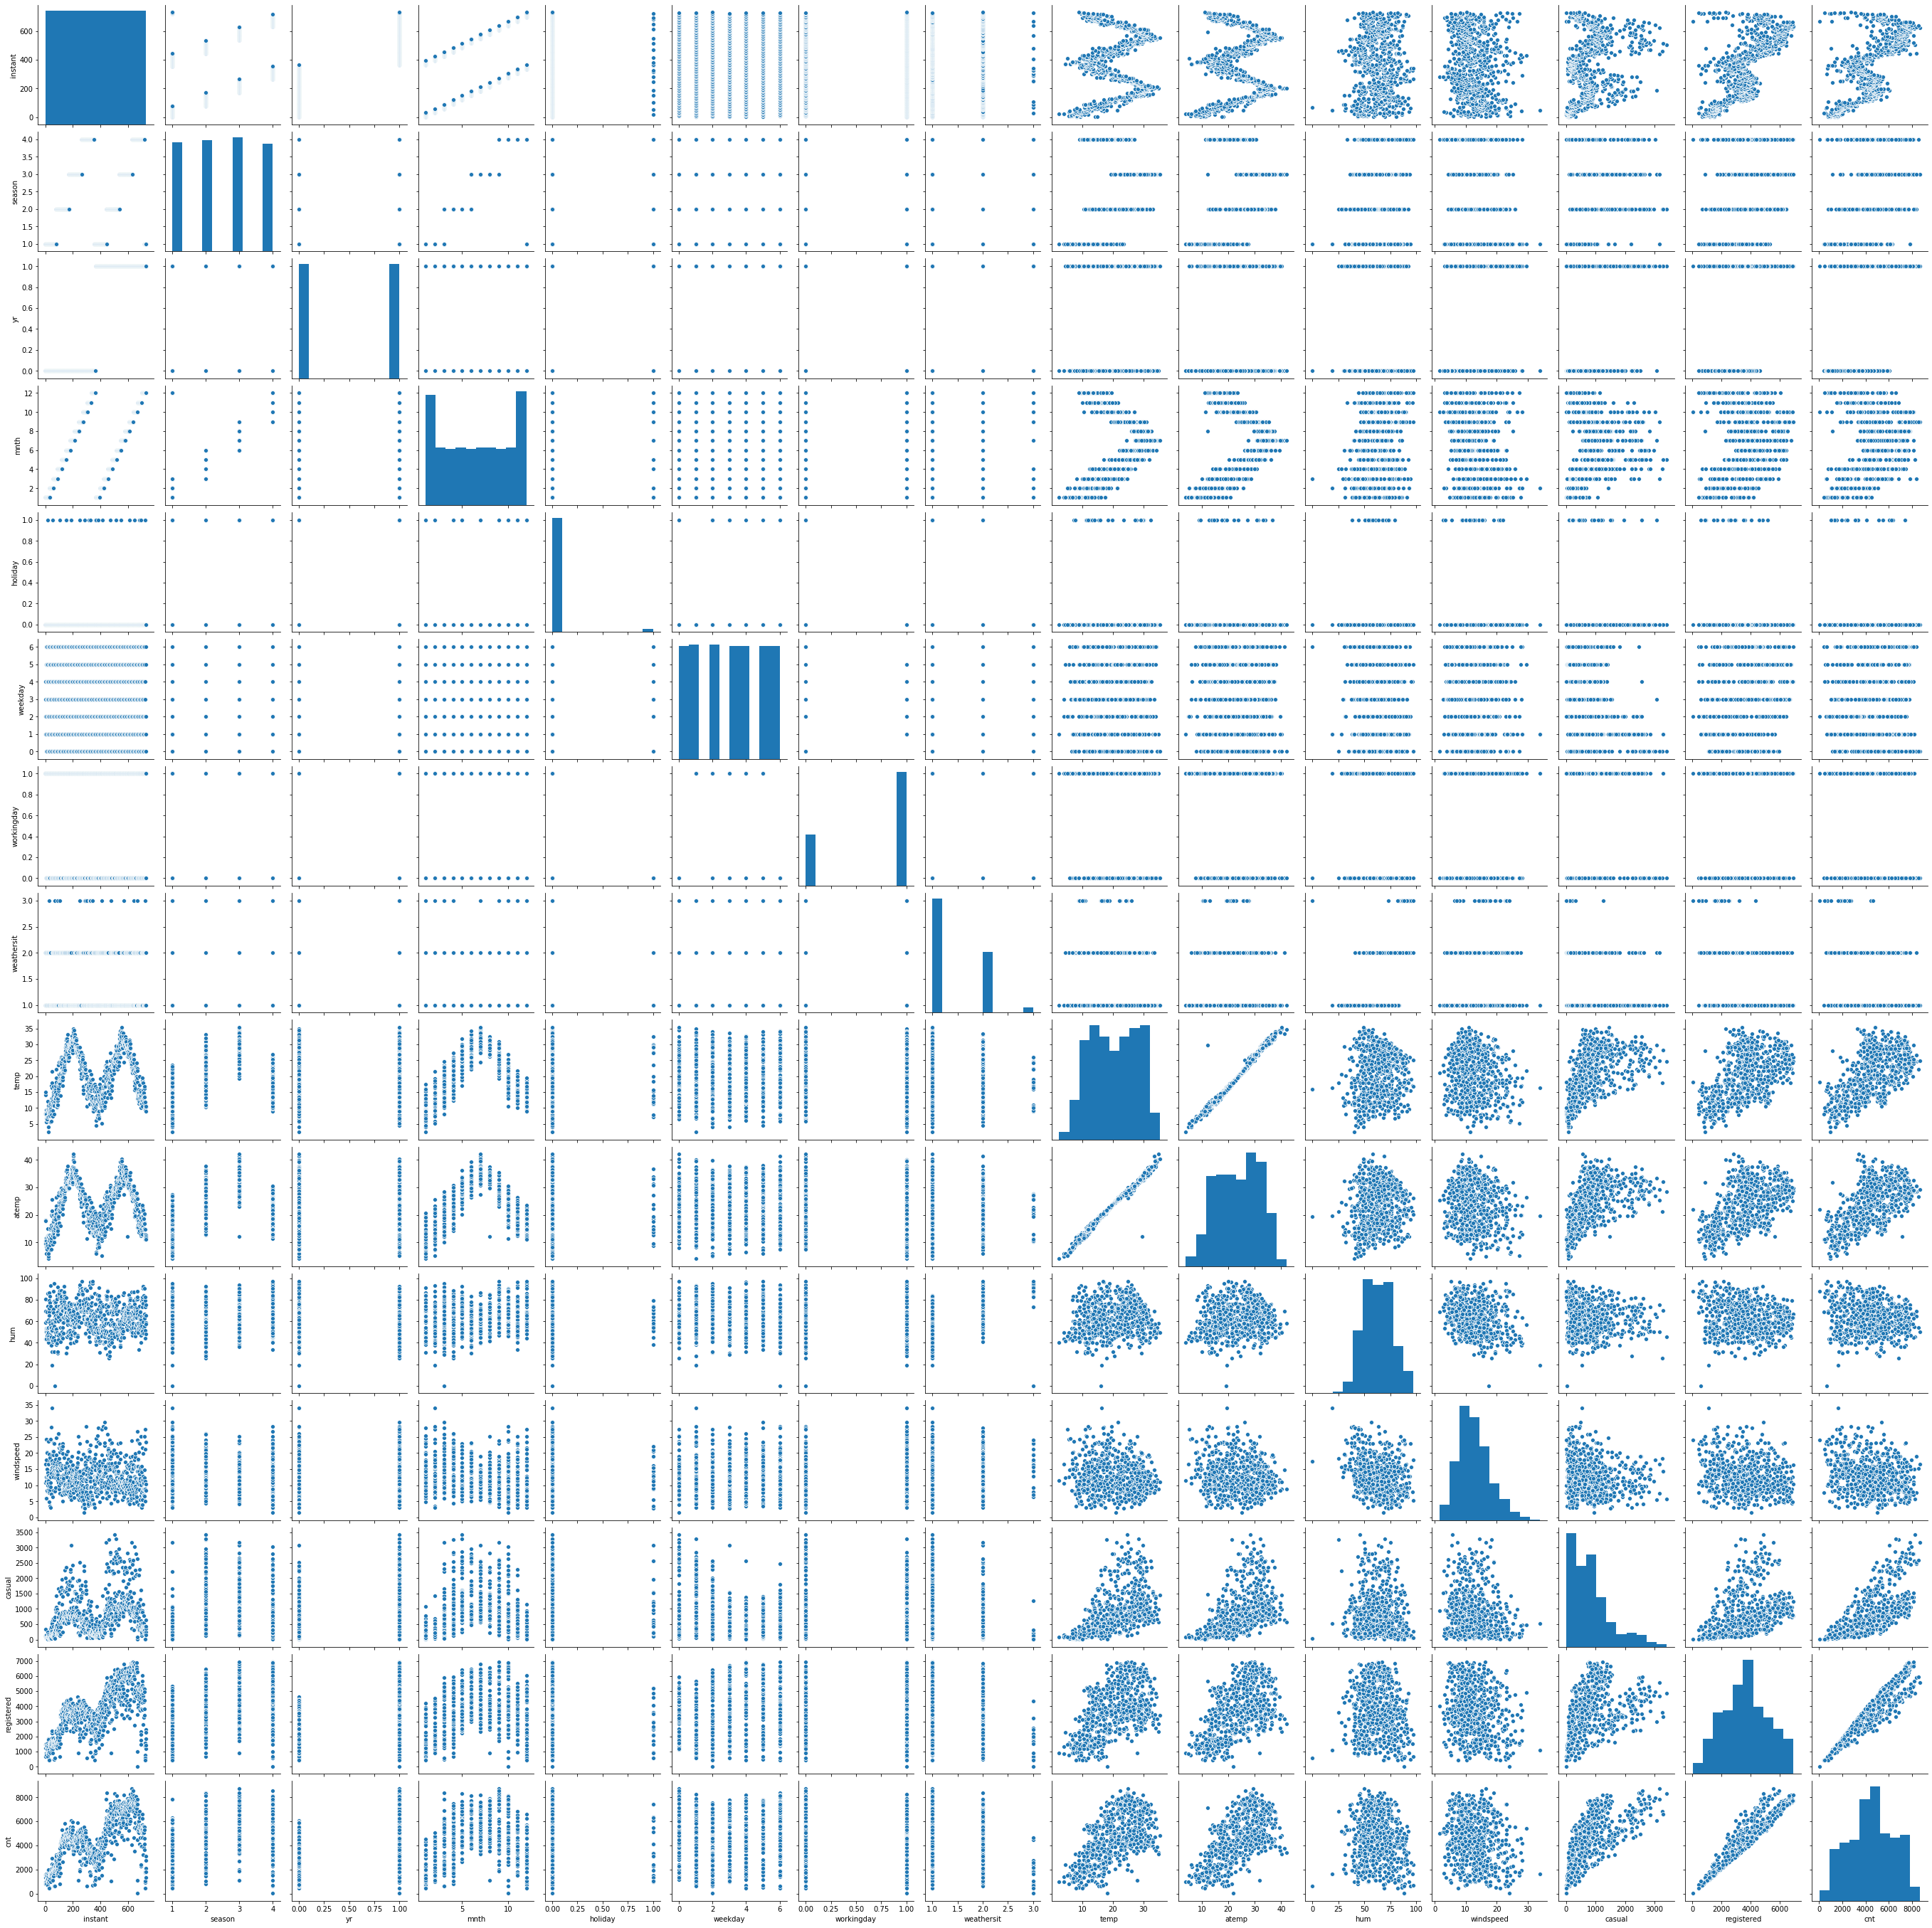

In [8]:
sns.pairplot(Bike_data)
plt.show()

## 2. Data Preparation

### Drop the unwanted columns in the dataset

* As we see the instant variable which was of unique identification. we dont need that column for analyisis as it is numbering of rows

* Dateday column which indicates year and month. please go through the subsequent columns which are of 'yr' and 'mnth' contains same information as 'dteday'. so instead of using dteday it is good to use yr and mnth column.

 * 'Casual' and 'Registered' columns need to be drop. Because look at the 'cnt' column which is a target variable.So cnt column is combination of casual and registered column. So we cannot use this 2 columns as independent variables because we already have combination of these two columns as target variable. If we use these both columns there will be change in building the model.

In [9]:
unwanted = ['instant','dteday','casual','registered']

In [10]:
Bike_data.drop(unwanted,axis = 1,inplace = True)

In [11]:
Bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Give data have season column which has 4 levels 'spring','summer','fall','winter' which are represnted as 1,2,3,4. so here we need to convert that numerical column to categorical column and do analysis on that. We have another column weathersit it also contains 4 levels 'clear', 'mist+cloudy', 'Light snow', 'Heavy Rainfall'. These are also needed to convert into categorical column befor doing model building.


### conversion of season column 

In [13]:
Bike_data['mnth']=Bike_data['mnth'].astype('category')
Bike_data['season']=Bike_data['season'].astype('category')
Bike_data['weathersit']=Bike_data['weathersit'].astype('category')
Bike_data['weekday']=Bike_data['weekday'].astype('category')
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
# convert season column to categorical column


Bike_data['season'] = Bike_data['season'].apply(lambda x: 'spring' if x == 1 else('summer' if x == 2 else('fall' if x == 3 else 'winter')))

In [15]:
# use value_counts() function to see the count of levels in column

Bike_data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### conversion of weekday column

In [16]:
Bike_data['weekday'] = Bike_data['weekday'].map({1:'monday', 2:'tuesday',3:'wednesday', 4: 'Thursday', 5: 'friday', 6:'saturday', 0:'sunday'})

### conversion of month column

In [17]:
Bike_data['mnth'] = Bike_data['mnth'].map({1:'Jan', 2:'feb',3:'mar', 4: 'apr', 5: 'may', 6:'jun', 7:'jul', 8:'aug', 9: 'sep', 10:'oct', 11:'nov', 12:'dec'})

In [18]:
Bike_data['mnth'].value_counts()

dec    62
oct    62
aug    62
jul    62
may    62
mar    62
Jan    62
nov    60
sep    60
jun    60
apr    60
feb    56
Name: mnth, dtype: int64

### conversion of weathersit column

In [19]:
Bike_data['weathersit'] = Bike_data['weathersit'].apply(lambda x: 'clear' if x == 1 else('Mist+cloudy' if x == 2 else('Light snow' if x == 3 else 'HeavyRain')))

In [20]:
Bike_data['weathersit'].value_counts()

clear          463
Mist+cloudy    246
Light snow      21
Name: weathersit, dtype: int64

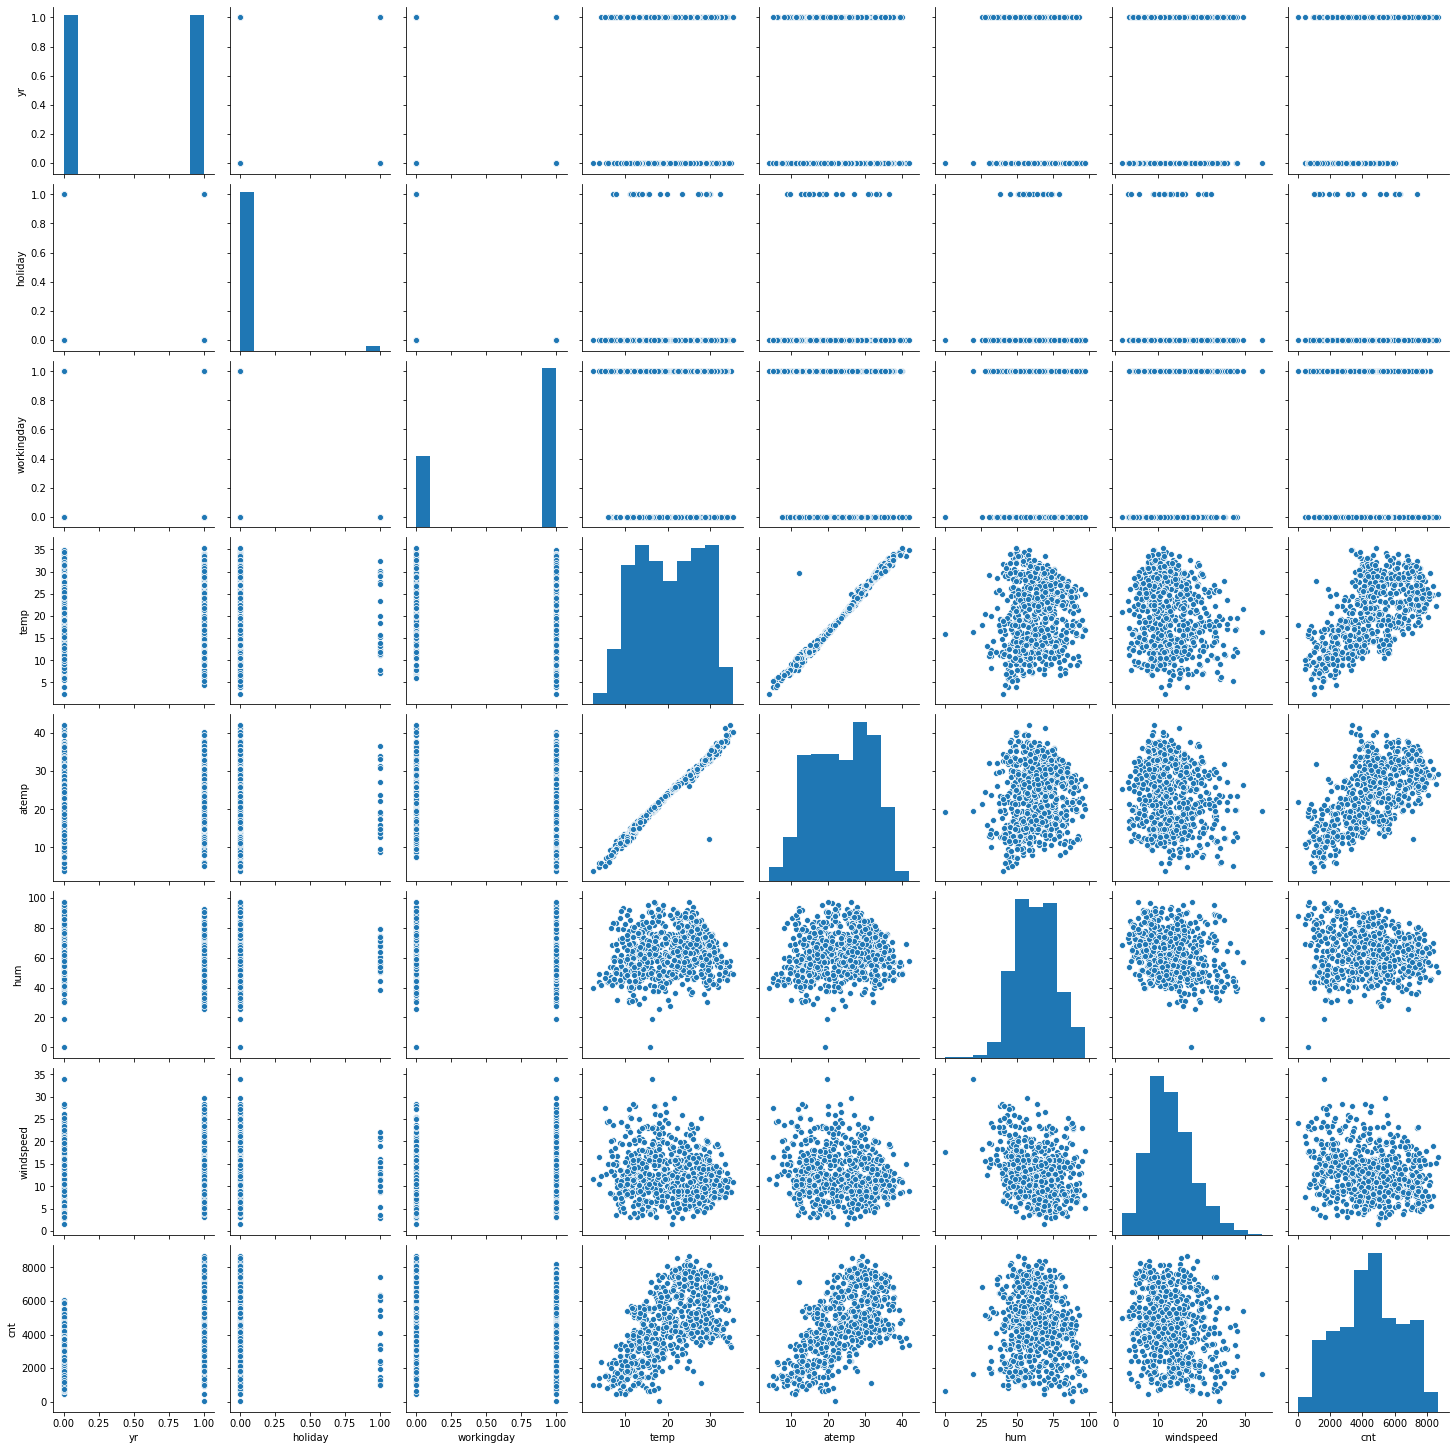

In [21]:
sns.pairplot(Bike_data)
plt.show()

* As we can see from above plot that temp and atemp are correlated so drop the 'atemp' which was correlated with target variable.

In [22]:
# drop the 'atemp' because it has high correlation with 'temp'
Bike_data.drop(['atemp'],axis=1,inplace = True)


## 3. Data Visualisation

### Visualisation for numerical varaibles(univariate analysis)

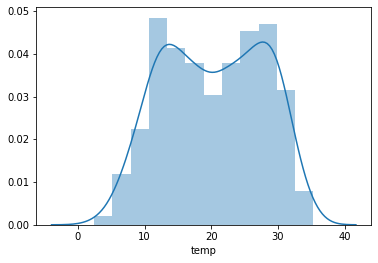

In [23]:
sns.distplot(Bike_data['temp'])
plt.show()

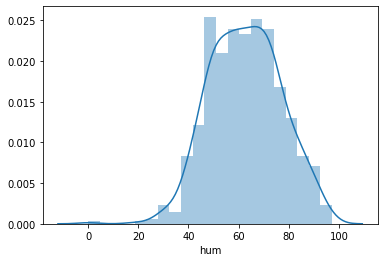

In [24]:
sns.distplot(Bike_data['hum'])
plt.show()

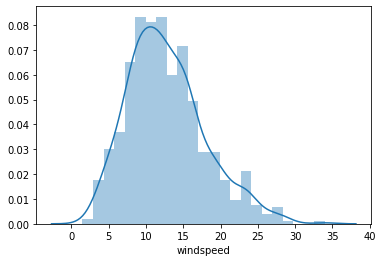

In [25]:
sns.distplot(Bike_data['windspeed'])
plt.show()

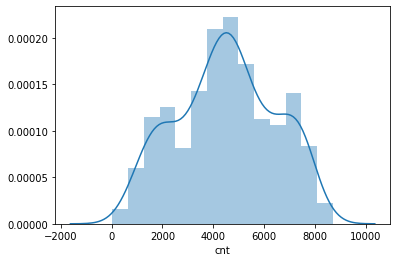

In [26]:
sns.distplot(Bike_data['cnt'])
plt.show()

### Visualisation for categorical variables(Bivariate Analysis)

In [27]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


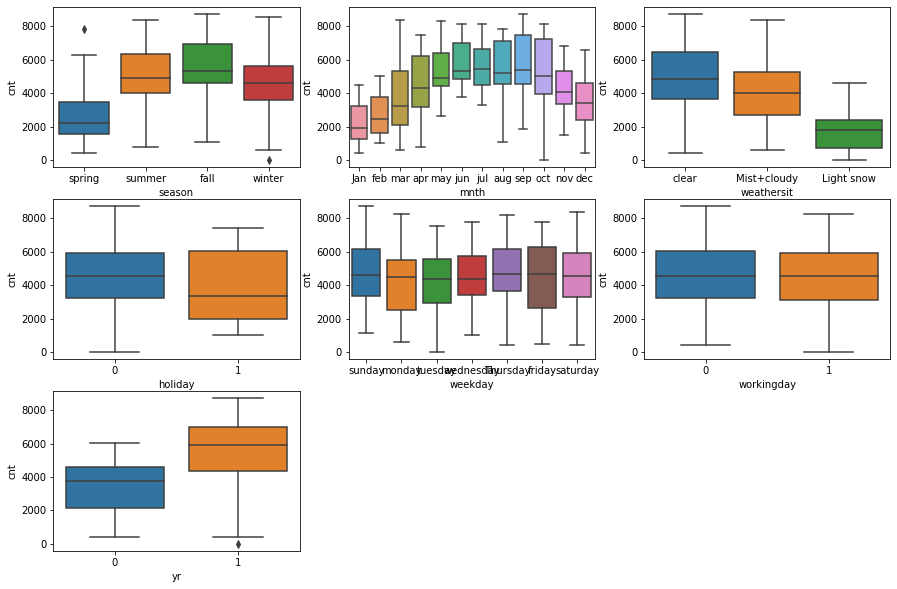

In [28]:
# plotting categorical columns 

plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_data)
plt.show()

* From the season plot we can say that demand of the bikes in spring season is less when compared to other seasons.
* The demand of bikes has increased in 2019 when compared with 2018.
* The demand of bikes is similar for ‘working day’ and ‘holiday’ from ‘workingday’ plot.
* Bike demand is less in holidays when compared with working days. 
* The bike demand is high from may to September but it was low for January and febraury.
* The bike demand is almost same for all working days.
* The demand of bikes is less when there is a ‘lightsnow’. For clear weather it was high in ‘weathersit’ plot. And we don’t have data for heavy rain so we cannot draw inferences for that.


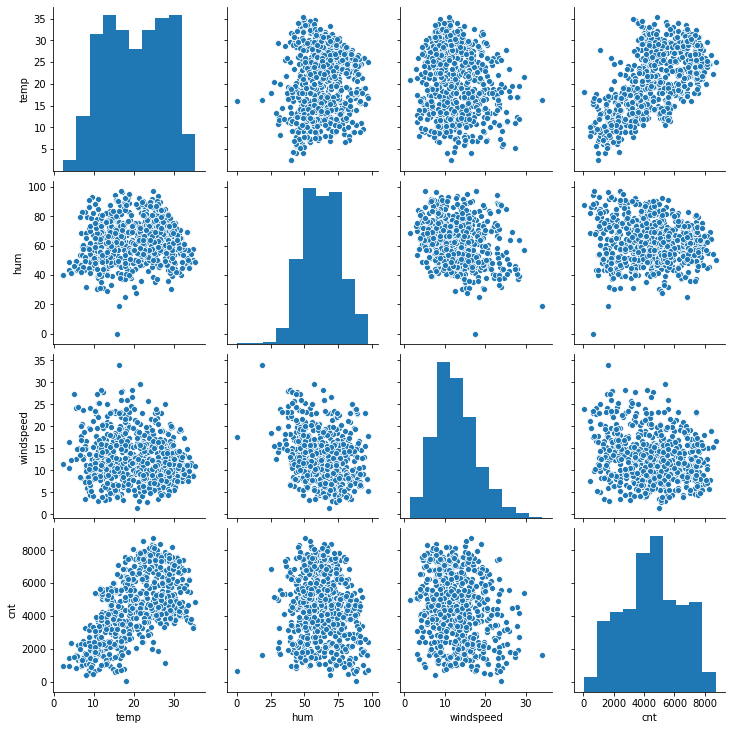

In [29]:
# plotting pairplot for numerical columns

num_col = ['temp','hum','windspeed','cnt']
sns.pairplot(Bike_data[num_col])
plt.show()

In [30]:
Bike_data.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000


## 4.Dummy variables

The variable season has four levels. 


As we know in dummy variables if there are n levels we need to take (n-1) columns as dummy variables.

Now, you don't need three columns. You can drop the fall column, as the fall column can be identified with just the last two columns where —

* 000 will correspond to fall
* 100 will correspond to spring
* 010 will correspond to summer
* 001 will correspond to winter

As we know in dummy variables if there are n levels we need to take (n-1) columns as dummy variables.

Now, you don't need three columns. You can drop the Light snow column, as the light snow column can be identified with just the last two columns where —

* 00 will correspond to Light snow
* 10 will correspond to mist+cloudy 
* 01 will correspond to clear

Now, you don't need seven columns. You can drop the Thursday column, as the Thursday column can be identified with just the last six columns where —

* 000000 will correspond to Thursday
* 100000 will correspond to friday
* 010000 will correspond to monday
* 001000 will correspond to saturday
* 000100 will correspond to sunday
* 000010 will correpond to tuesday 
* 000001 will correspond to wednesday

In [31]:
dummy_var = ['mnth','season','weathersit','weekday']

x = pd.get_dummies(Bike_data[dummy_var],drop_first = True)
x.head()


,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,...,season_fall,season_winter,weathersit_Mist+cloudy,weathersit_Light snow,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_Thursday,weekday_friday,weekday_saturday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
Bike_data = pd.concat([Bike_data,x],axis = 1)

In [33]:
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,season_fall,season_winter,weathersit_Mist+cloudy,weathersit_Light snow,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_Thursday,weekday_friday,weekday_saturday
0,spring,0,Jan,0,monday,1,Mist+cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
1,spring,0,Jan,0,tuesday,1,Mist+cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,1,0,0,0,0
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [34]:
Bike_data = Bike_data.drop(columns = dummy_var,axis = 1)

In [35]:
Bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weathersit_Mist+cloudy,weathersit_Light snow,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_Thursday,weekday_friday,weekday_saturday
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 5. splitting the data to Training and Test sets

split the data into two sets - Train set and test set 

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows respectively
np.random.seed(0)
df_train, df_test = train_test_split(Bike_data , train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

Note: As we see from data preparation that data was in the form of highest in some columns and lowest in other columns so there will be big change in the data while doing modeling so do the scaling so that every column will be similar like 0 to 1 .

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
var = ['temp','hum','windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weathersit_Mist+cloudy,weathersit_Light snow,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_Thursday,weekday_friday,weekday_saturday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,1,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [40]:
df_train.shape

(510, 29)

In [41]:
df_test.shape

(219, 29)

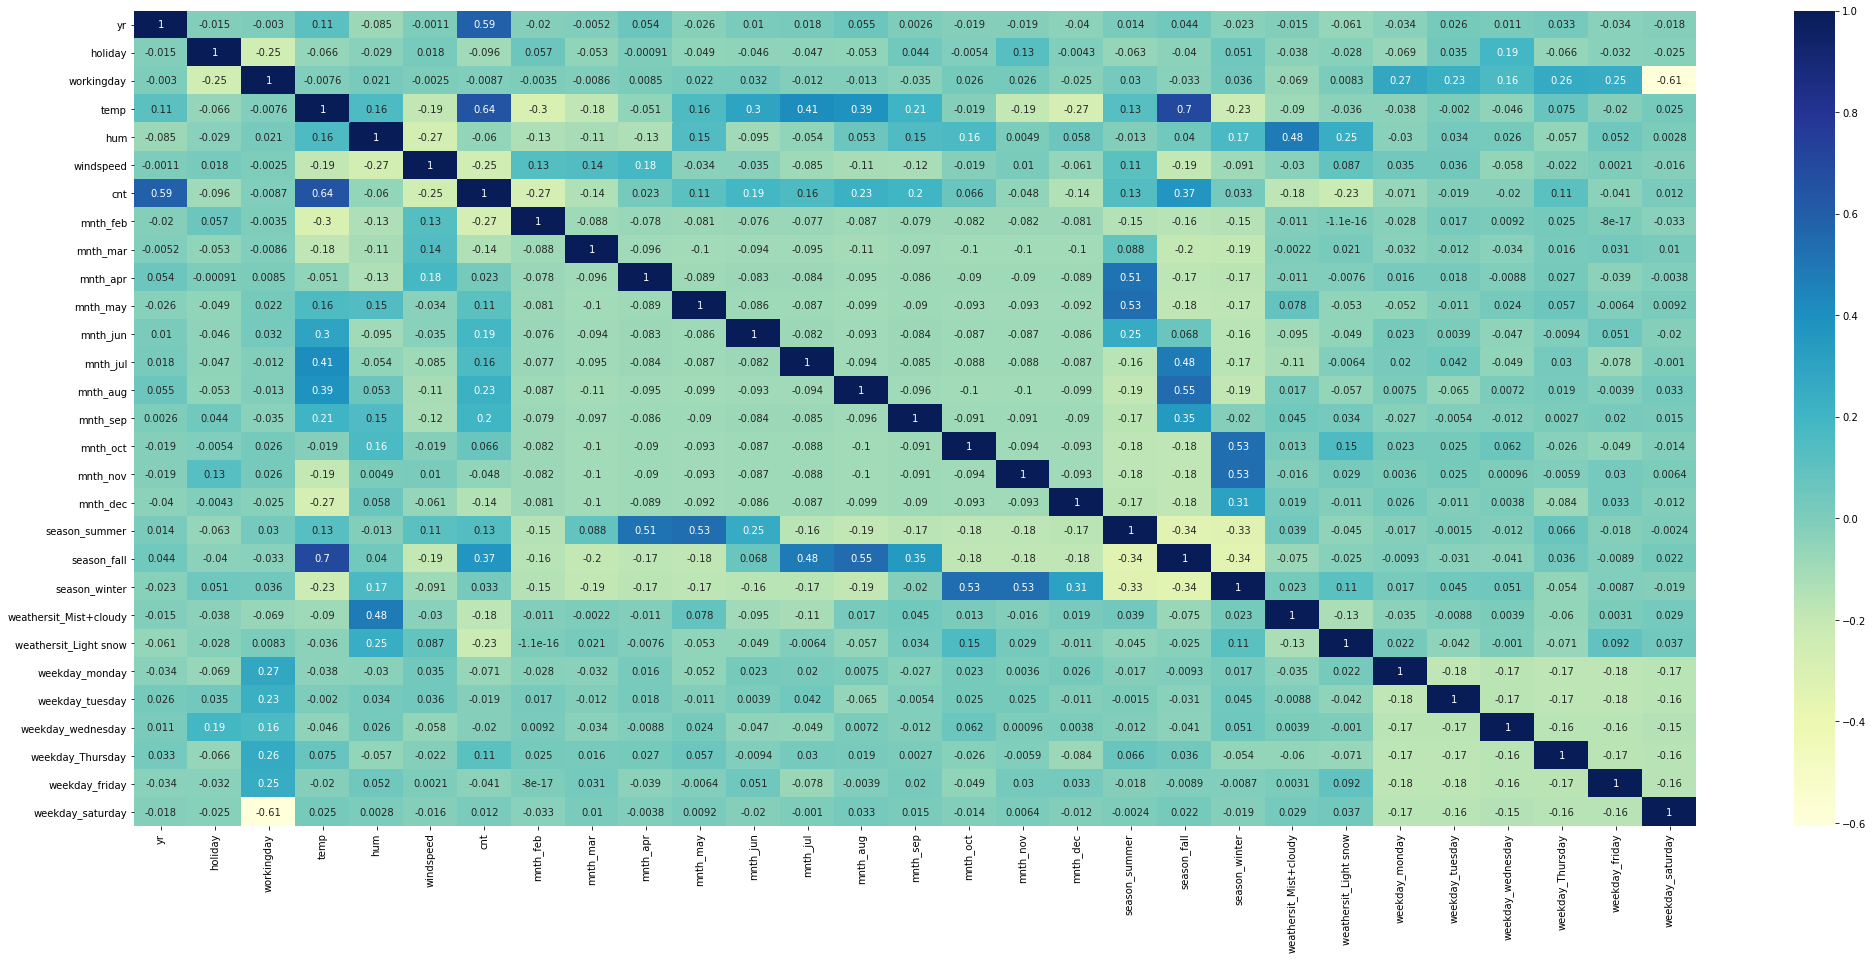

In [42]:
plt.figure(figsize = (35, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

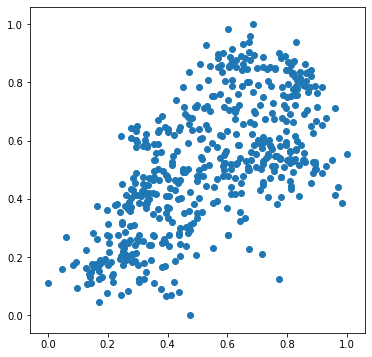

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [44]:
y_train = df_train.pop('cnt')
x_train = df_train

## 6. Building a Linear Model

In [45]:
# Import important libraries linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# use the LinearRegression() object 

lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,20)  # Here 15 indicates number of attributes 
rfe = rfe.fit(x_train,y_train)

In [47]:
x = pd.DataFrame({'col':x_train.columns,'rfe.support':rfe.support_,'rfe.ranking':rfe.ranking_})
x.sort_values(by='rfe.ranking')

,col,rfe.support,rfe.ranking
0,yr,True,1
25,weekday_Thursday,True,1
21,weathersit_Light snow,True,1
20,weathersit_Mist+cloudy,True,1
19,season_winter,True,1
18,season_fall,True,1
17,season_summer,True,1
14,mnth_oct,True,1
26,weekday_friday,True,1
12,mnth_aug,True,1


In [48]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_mar',
       'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_aug', 'mnth_sep', 'mnth_oct',
       'season_summer', 'season_fall', 'season_winter',
       'weathersit_Mist+cloudy', 'weathersit_Light snow', 'weekday_Thursday',
       'weekday_friday'],
      dtype='object')

In [49]:
x_train.columns[~rfe.support_]

Index(['mnth_feb', 'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_monday',
       'weekday_tuesday', 'weekday_wednesday', 'weekday_saturday'],
      dtype='object')

In [50]:
x_train_rfe = x_train[col]

In [51]:
# 'VIF' for highly correlated values

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.11
4,hum,18.12
14,season_fall,9.03
13,season_summer,7.47
2,workingday,4.34
5,windspeed,4.02
8,mnth_may,3.74
7,mnth_apr,3.34
15,season_winter,3.25
9,mnth_jun,2.48


From above insights we can see that temp has highest correlated value.But when we drop of the variable the R-squared values will be highly decreased. As we can see from pairplot these variables are very useful in terms of target variable. 

In [52]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)

In [53]:
lm = sm.OLS(y_train,x_train_rfe1).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.05e-186
Time:                        19:17:24   Log-Likelihood:                 522.07
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2452      0.028      8.844      0.000       0.191       0.300
yr                         0.2307      0.008     28.714      0.000       0.215       0.246
holiday                   -0.1036      0.026     -3.961      0.000      -0.155      -0.052
workingday                -0.0286      0.010     -2.898      0.004      -0.048      -0.009
temp                       0.4609      0.037     12.453      0.000       0.388       0.534
hum                       -0.1617      0.038     -4.259      0.000      -0.236      -0.087
windspeed                 -0.1825      0.026     -7.134      0.000      -0.233      -0.132
mnth_mar                   0.0476      0.017      2.821      0.005       0.014       0.081
mnth_apr                   0.0435      0.026      1.690      0.092      -0.007       0.094
mnth_may                   0.0665      0.026      2.539      0.011       0.015       0.118
mnth_jun                   0.0393      0.023      1.735      0.083      -0.005       0.084
mnth_aug                   0.0593      0.018      3.287      0.001       0.024       0.095
mnth_sep                   0.1253      0.017      7.172      0.000       0.091       0.160
mnth_oct                   0.0480      0.017      2.759      0.006       0.014       0.082
season_summer              0.0891      0.022      4.101      0.000       0.046       0.132
season_fall                0.0490      0.023      2.125      0.034       0.004       0.094
season_winter              0.1598      0.014     11.206      0.000       0.132       0.188
weathersit_Mist+cloudy    -0.0588      0.010     -5.638      0.000      -0.079      -0.038
weathersit_Light snow     -0.2493      0.026     -9.477      0.000      -0.301      -0.198
weekday_Thursday           0.0255      0.012      2.104      0.036       0.002       0.049
weekday_friday             0.0212      0.012      1.766      0.078      -0.002       0.045
==============================================================================
Omnibus:                       76.749   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.284
Skew:                          -0.765   Prob(JB):                     1.07e-42
Kurtosis:                       5.599   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop the columns by using following order.
* High p value and High VIF value
* High p value but low VIF
* High VIF but low P value

##### Note: from above summary in p value we have seen 'mnth_apr' row has >0.05 value so we can drop that value

In [55]:
x_train_rfe.drop(['mnth_apr'],axis=1,inplace =True)

In [56]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          3.54e-187
Time:                        19:17:25   Log-Likelihood:                 520.58
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2488      0.028      8.983      0.000       0.194       0.303
yr                         0.2310      0.008     28.713      0.000       0.215       0.247
holiday                   -0.1043      0.026     -3.979      0.000      -0.156      -0.053
workingday                -0.0284      0.010     -2.871      0.004      -0.048      -0.009
temp                       0.4660      0.037     12.612      0.000       0.393       0.539
hum                       -0.1672      0.038     -4.413      0.000      -0.242      -0.093
windspeed                 -0.1791      0.026     -7.010      0.000      -0.229      -0.129
mnth_mar                   0.0342      0.015      2.292      0.022       0.005       0.064
mnth_may                   0.0364      0.019      1.892      0.059      -0.001       0.074
mnth_jun                   0.0176      0.019      0.939      0.348      -0.019       0.054
mnth_aug                   0.0545      0.018      3.053      0.002       0.019       0.090
mnth_sep                   0.1219      0.017      7.011      0.000       0.088       0.156
mnth_oct                   0.0472      0.017      2.708      0.007       0.013       0.081
season_summer              0.1148      0.016      7.403      0.000       0.084       0.145
season_fall                0.0485      0.023      2.099      0.036       0.003       0.094
season_winter              0.1568      0.014     11.062      0.000       0.129       0.185
weathersit_Mist+cloudy    -0.0585      0.010     -5.600      0.000      -0.079      -0.038
weathersit_Light snow     -0.2487      0.026     -9.439      0.000      -0.301      -0.197
weekday_Thursday           0.0253      0.012      2.077      0.038       0.001       0.049
weekday_friday             0.0215      0.012      1.789      0.074      -0.002       0.045
==============================================================================
Omnibus:                       78.433   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.208
Skew:                          -0.780   Prob(JB):                     9.11e-44
Kurtosis:                       5.626   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note : As we can see from above p value "mnth_jun" has highest value so we can drop that column

In [57]:
x_train_rfe.drop(['mnth_jun'],axis=1,inplace =True)

In [58]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          4.38e-188
Time:                        19:17:25   Log-Likelihood:                 520.12
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2483      0.028      8.968      0.000       0.194       0.303
yr                         0.2305      0.008     28.717      0.000       0.215       0.246
holiday                   -0.1052      0.026     -4.017      0.000      -0.157      -0.054
workingday                -0.0282      0.010     -2.851      0.005      -0.048      -0.009
temp                       0.4791      0.034     13.995      0.000       0.412       0.546
hum                       -0.1703      0.038     -4.512      0.000      -0.244      -0.096
windspeed                 -0.1811      0.025     -7.117      0.000      -0.231      -0.131
mnth_mar                   0.0313      0.015      2.144      0.033       0.003       0.060
mnth_may                   0.0294      0.018      1.658      0.098      -0.005       0.064
mnth_aug                   0.0505      0.017      2.913      0.004       0.016       0.084
mnth_sep                   0.1191      0.017      6.953      0.000       0.085       0.153
mnth_oct                   0.0456      0.017      2.628      0.009       0.012       0.080
season_summer              0.1166      0.015      7.575      0.000       0.086       0.147
season_fall                0.0451      0.023      1.978      0.048       0.000       0.090
season_winter              0.1550      0.014     11.038      0.000       0.127       0.183
weathersit_Mist+cloudy    -0.0583      0.010     -5.581      0.000      -0.079      -0.038
weathersit_Light snow     -0.2487      0.026     -9.438      0.000      -0.300      -0.197
weekday_Thursday           0.0247      0.012      2.037      0.042       0.001       0.049
weekday_friday             0.0222      0.012      1.849      0.065      -0.001       0.046
==============================================================================
Omnibus:                       78.215   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.403
Skew:                          -0.785   Prob(JB):                     1.01e-42
Kurtosis:                       5.576   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: 'mnth_may' column has p-value greater than 0.05.

In [60]:
x_train_rfe.drop(['mnth_may'],axis=1,inplace =True)

In [61]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.32e-188
Time:                        19:17:25   Log-Likelihood:                 518.70
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -925.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2430      0.028      8.820      0.000       0.189       0.297
yr                         0.2299      0.008     28.620      0.000       0.214       0.246
holiday                   -0.1064      0.026     -4.059      0.000      -0.158      -0.055
workingday                -0.0284      0.010     -2.868      0.004      -0.048      -0.009
temp                       0.4891      0.034     14.489      0.000       0.423       0.555
hum                       -0.1624      0.038     -4.330      0.000      -0.236      -0.089
windspeed                 -0.1831      0.025     -7.190      0.000      -0.233      -0.133
mnth_mar                   0.0267      0.014      1.859      0.064      -0.002       0.055
mnth_aug                   0.0500      0.017      2.881      0.004       0.016       0.084
mnth_sep                   0.1186      0.017      6.912      0.000       0.085       0.152
mnth_oct                   0.0441      0.017      2.542      0.011       0.010       0.078
season_summer              0.1228      0.015      8.211      0.000       0.093       0.152
season_fall                0.0385      0.022      1.710      0.088      -0.006       0.083
season_winter              0.1521      0.014     10.896      0.000       0.125       0.180
weathersit_Mist+cloudy    -0.0584      0.010     -5.583      0.000      -0.079      -0.038
weathersit_Light snow     -0.2507      0.026     -9.508      0.000      -0.303      -0.199
weekday_Thursday           0.0254      0.012      2.089      0.037       0.002       0.049
weekday_friday             0.0223      0.012      1.856      0.064      -0.001       0.046
==============================================================================
Omnibus:                       76.147   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.225
Skew:                          -0.784   Prob(JB):                     1.99e-39
Kurtosis:                       5.435   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: 'season_fall' column has highest p value. Drop the column

In [62]:
x_train_rfe.drop(['season_fall'],axis=1,inplace =True)

In [63]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          4.25e-189
Time:                        19:17:26   Log-Likelihood:                 517.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2433      0.028      8.813      0.000       0.189       0.298
yr                         0.2287      0.008     28.522      0.000       0.213       0.244
holiday                   -0.1081      0.026     -4.115      0.000      -0.160      -0.056
workingday                -0.0280      0.010     -2.830      0.005      -0.048      -0.009
temp                       0.5324      0.022     23.791      0.000       0.488       0.576
hum                       -0.1717      0.037     -4.616      0.000      -0.245      -0.099
windspeed                 -0.1869      0.025     -7.352      0.000      -0.237      -0.137
mnth_mar                   0.0218      0.014      1.545      0.123      -0.006       0.049
mnth_aug                   0.0607      0.016      3.740      0.000       0.029       0.093
mnth_sep                   0.1283      0.016      7.902      0.000       0.096       0.160
mnth_oct                   0.0400      0.017      2.324      0.021       0.006       0.074
season_summer              0.1051      0.011      9.722      0.000       0.084       0.126
season_winter              0.1405      0.012     11.493      0.000       0.116       0.165
weathersit_Mist+cloudy    -0.0571      0.010     -5.464      0.000      -0.078      -0.037
weathersit_Light snow     -0.2454      0.026     -9.354      0.000      -0.297      -0.194
weekday_Thursday           0.0253      0.012      2.077      0.038       0.001       0.049
weekday_friday             0.0215      0.012      1.790      0.074      -0.002       0.045
==============================================================================
Omnibus:                       68.224   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.889
Skew:                          -0.729   Prob(JB):                     2.83e-33
Kurtosis:                       5.220   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: 'mnth_mar' column has highest p value

In [64]:
x_train_rfe.drop(['mnth_mar'],axis=1,inplace =True)

In [65]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.01e-189
Time:                        19:17:26   Log-Likelihood:                 515.96
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     494   BIC:                            -932.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2495      0.027      9.120      0.000       0.196       0.303
yr                         0.2289      0.008     28.506      0.000       0.213       0.245
holiday                   -0.1106      0.026     -4.213      0.000      -0.162      -0.059
workingday                -0.0286      0.010     -2.881      0.004      -0.048      -0.009
temp                       0.5272      0.022     23.797      0.000       0.484       0.571
hum                       -0.1728      0.037     -4.640      0.000      -0.246      -0.100
windspeed                 -0.1846      0.025     -7.262      0.000      -0.234      -0.135
mnth_aug                   0.0588      0.016      3.632      0.000       0.027       0.091
mnth_sep                   0.1268      0.016      7.814      0.000       0.095       0.159
mnth_oct                   0.0404      0.017      2.341      0.020       0.006       0.074
season_summer              0.1051      0.011      9.704      0.000       0.084       0.126
season_winter              0.1368      0.012     11.395      0.000       0.113       0.160
weathersit_Mist+cloudy    -0.0570      0.010     -5.448      0.000      -0.078      -0.036
weathersit_Light snow     -0.2440      0.026     -9.292      0.000      -0.296      -0.192
weekday_Thursday           0.0259      0.012      2.125      0.034       0.002       0.050
weekday_friday             0.0222      0.012      1.846      0.065      -0.001       0.046
==============================================================================
Omnibus:                       67.425   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.081
Skew:                          -0.705   Prob(JB):                     2.11e-34
Kurtosis:                       5.304   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 'weekday_friday' has highest p-value.

In [66]:
x_train_rfe.drop(['weekday_friday'],axis=1,inplace =True)

In [67]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          3.89e-190
Time:                        19:17:26   Log-Likelihood:                 514.20
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     495   BIC:                            -934.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2493      0.027      9.091      0.000       0.195       0.303
yr                         0.2286      0.008     28.404      0.000       0.213       0.244
holiday                   -0.1087      0.026     -4.135      0.000      -0.160      -0.057
workingday                -0.0229      0.009     -2.420      0.016      -0.041      -0.004
temp                       0.5273      0.022     23.747      0.000       0.484       0.571
hum                       -0.1721      0.037     -4.612      0.000      -0.245      -0.099
windspeed                 -0.1848      0.025     -7.254      0.000      -0.235      -0.135
mnth_aug                   0.0587      0.016      3.617      0.000       0.027       0.091
mnth_sep                   0.1272      0.016      7.817      0.000       0.095       0.159
mnth_oct                   0.0383      0.017      2.222      0.027       0.004       0.072
season_summer              0.1047      0.011      9.644      0.000       0.083       0.126
season_winter              0.1365      0.012     11.343      0.000       0.113       0.160
weathersit_Mist+cloudy    -0.0567      0.010     -5.405      0.000      -0.077      -0.036
weathersit_Light snow     -0.2401      0.026     -9.152      0.000      -0.292      -0.189
weekday_Thursday           0.0204      0.012      1.720      0.086      -0.003       0.044
==============================================================================
Omnibus:                       67.310   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.631
Skew:                          -0.711   Prob(JB):                     1.19e-33
Kurtosis:                       5.261   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: 'weekday_thursday' has highest p value.

In [68]:
x_train_rfe.drop(['weekday_Thursday'],axis=1,inplace =True)

In [69]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.15e-190
Time:                        19:17:27   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     496   BIC:                            -938.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2502      0.027      9.106      0.000       0.196       0.304
yr                         0.2288      0.008     28.385      0.000       0.213       0.245
holiday                   -0.1085      0.026     -4.118      0.000      -0.160      -0.057
workingday                -0.0187      0.009     -2.046      0.041      -0.037      -0.001
temp                       0.5292      0.022     23.814      0.000       0.486       0.573
hum                       -0.1747      0.037     -4.676      0.000      -0.248      -0.101
windspeed                 -0.1858      0.026     -7.283      0.000      -0.236      -0.136
mnth_aug                   0.0588      0.016      3.614      0.000       0.027       0.091
mnth_sep                   0.1276      0.016      7.828      0.000       0.096       0.160
mnth_oct                   0.0385      0.017      2.230      0.026       0.005       0.073
season_summer              0.1055      0.011      9.708      0.000       0.084       0.127
season_winter              0.1361      0.012     11.290      0.000       0.112       0.160
weathersit_Mist+cloudy    -0.0570      0.011     -5.424      0.000      -0.078      -0.036
weathersit_Light snow     -0.2424      0.026     -9.233      0.000      -0.294      -0.191
==============================================================================
Omnibus:                       69.297   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.467
Skew:                          -0.730   Prob(JB):                     1.06e-34
Kurtosis:                       5.287   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Note: 'workingday' column has highest p value

In [70]:
x_train_rfe.drop(['workingday'],axis=1,inplace =True)

In [71]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          6.02e-191
Time:                        19:17:27   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2390      0.027      8.848      0.000       0.186       0.292
yr                         0.2288      0.008     28.291      0.000       0.213       0.245
holiday                   -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp                       0.5308      0.022     23.821      0.000       0.487       0.575
hum                       -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed                 -0.1868      0.026     -7.297      0.000      -0.237      -0.136
mnth_aug                   0.0588      0.016      3.604      0.000       0.027       0.091
mnth_sep                   0.1280      0.016      7.829      0.000       0.096       0.160
mnth_oct                   0.0386      0.017      2.226      0.026       0.005       0.073
season_summer              0.1048      0.011      9.620      0.000       0.083       0.126
season_winter              0.1353      0.012     11.189      0.000       0.112       0.159
weathersit_Mist+cloudy    -0.0546      0.010     -5.210      0.000      -0.075      -0.034
weathersit_Light snow     -0.2401      0.026     -9.125      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
x_train_rfe.drop(['mnth_oct'],axis=1,inplace =True)

In [73]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          4.43e-191
Time:                        19:17:27   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2317      0.027      8.607      0.000       0.179       0.285
yr                         0.2286      0.008     28.154      0.000       0.213       0.245
holiday                   -0.0958      0.026     -3.741      0.000      -0.146      -0.045
temp                       0.5395      0.022     24.503      0.000       0.496       0.583
hum                       -0.1759      0.037     -4.694      0.000      -0.250      -0.102
windspeed                 -0.1835      0.026     -7.151      0.000      -0.234      -0.133
mnth_aug                   0.0553      0.016      3.393      0.001       0.023       0.087
mnth_sep                   0.1222      0.016      7.542      0.000       0.090       0.154
season_summer              0.1030      0.011      9.441      0.000       0.082       0.124
season_winter              0.1482      0.011     13.942      0.000       0.127       0.169
weathersit_Mist+cloudy    -0.0544      0.011     -5.167      0.000      -0.075      -0.034
weathersit_Light snow     -0.2351      0.026     -8.932      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       56.424   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.275
Skew:                          -0.608   Prob(JB):                     6.26e-28
Kurtosis:                       5.101   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# drop the mnth_aug column also 
x_train_rfe.drop(['mnth_aug'],axis=1,inplace =True)

In [75]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          7.80e-190
Time:                        19:17:27   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2256      0.027      8.314      0.000       0.172       0.279
yr                         0.2289      0.008     27.907      0.000       0.213       0.245
holiday                   -0.0980      0.026     -3.787      0.000      -0.149      -0.047
temp                       0.5706      0.020     28.206      0.000       0.531       0.610
hum                       -0.1740      0.038     -4.594      0.000      -0.248      -0.100
windspeed                 -0.1867      0.026     -7.207      0.000      -0.238      -0.136
mnth_sep                   0.1067      0.016      6.793      0.000       0.076       0.138
season_summer              0.0895      0.010      8.719      0.000       0.069       0.110
season_winter              0.1402      0.010     13.386      0.000       0.120       0.161
weathersit_Mist+cloudy    -0.0518      0.011     -4.887      0.000      -0.073      -0.031
weathersit_Light snow     -0.2367      0.027     -8.899      0.000      -0.289      -0.184
==============================================================================
Omnibus:                       60.330   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.807
Skew:                          -0.668   Prob(JB):                     4.80e-28
Kurtosis:                       5.033   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.27
2,temp,8.00
4,windspeed,3.55
8,weathersit_Mist+cloudy,2.11
0,yr,2.01
7,season_winter,1.66
6,season_summer,1.58
5,mnth_sep,1.21
9,weathersit_Light snow,1.16
1,holiday,1.04


##### Note: 'hum' column has highest VIF value because it is greater than 10.

In [77]:
x_train_rfe.drop(['hum'],axis=1,inplace =True)

In [78]:
import statsmodels.api as sm  
x_train_rfe1 = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.37e-186
Time:                        19:17:28   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1264      0.017      7.541      0.000       0.093       0.159
yr                         0.2328      0.008     27.973      0.000       0.216       0.249
holiday                   -0.0992      0.026     -3.761      0.000      -0.151      -0.047
temp                       0.5480      0.020     27.381      0.000       0.509       0.587
windspeed                 -0.1533      0.025     -6.045      0.000      -0.203      -0.103
mnth_sep                   0.1011      0.016      6.327      0.000       0.070       0.132
season_summer              0.0868      0.010      8.307      0.000       0.066       0.107
season_winter              0.1306      0.010     12.476      0.000       0.110       0.151
weathersit_Mist+cloudy    -0.0797      0.009     -8.995      0.000      -0.097      -0.062
weathersit_Light snow     -0.2838      0.025    -11.344      0.000      -0.333      -0.235
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
5,season_summer,1.56
7,weathersit_Mist+cloudy,1.48
6,season_winter,1.38
4,mnth_sep,1.20
8,weathersit_Light snow,1.08
1,holiday,1.03


The final variables are:
   * temp
   * windspeed
   * yr
   * season_summer
   * weathersit_Mist+cloudy
   * season_winter
   * mnth_sep
   * weathersit_Light snow
   * holiday

## 7. Residual Analysis of train data

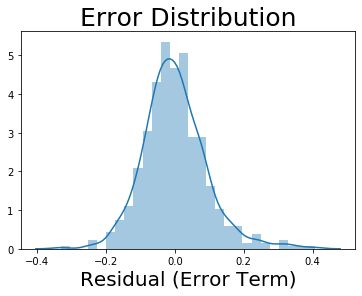

In [80]:
y_train_pred = lm.predict(x_train_rfe1)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

* from above graph we can say that the train set is normally distributed.

In [81]:
Bike_data.dtypes


yr                          int64
holiday                     int64
workingday                  int64
temp                      float64
hum                       float64
windspeed                 float64
cnt                         int64
mnth_feb                    uint8
mnth_mar                    uint8
mnth_apr                    uint8
mnth_may                    uint8
mnth_jun                    uint8
mnth_jul                    uint8
mnth_aug                    uint8
mnth_sep                    uint8
mnth_oct                    uint8
mnth_nov                    uint8
mnth_dec                    uint8
season_summer               uint8
season_fall                 uint8
season_winter               uint8
weathersit_Mist+cloudy      uint8
weathersit_Light snow       uint8
weekday_monday              uint8
weekday_tuesday             uint8
weekday_wednesday           uint8
weekday_Thursday            uint8
weekday_friday              uint8
weekday_saturday            uint8
dtype: object

## 8. Making Predictions using Final Model

In [82]:
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [83]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_feb,mnth_mar,mnth_apr,...,season_fall,season_winter,weathersit_Mist+cloudy,weathersit_Light snow,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_Thursday,weekday_friday,weekday_saturday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.100457,0.054795,0.091324,...,0.246575,0.232877,0.319635,0.027397,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.301297,0.228100,0.288730,...,0.432005,0.423633,0.467403,0.163612,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
y_test = df_test.pop('cnt')
x_test = df_test


In [85]:
col = x_train_rfe.columns
x_test = x_test[col]

In [86]:
x_test_lm = sm.add_constant(x_test)
x_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   yr                      219 non-null    int64  
 2   holiday                 219 non-null    int64  
 3   temp                    219 non-null    float64
 4   windspeed               219 non-null    float64
 5   mnth_sep                219 non-null    uint8  
 6   season_summer           219 non-null    uint8  
 7   season_winter           219 non-null    uint8  
 8   weathersit_Mist+cloudy  219 non-null    uint8  
 9   weathersit_Light snow   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


## 9. Model Evaluation

In [87]:
y_pred = lm.predict(x_test_lm)

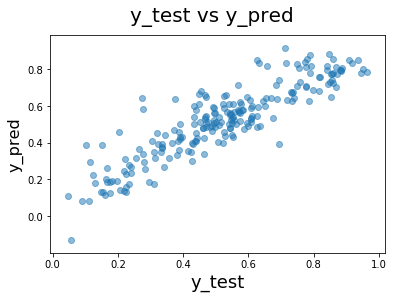

In [88]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [89]:
from sklearn.metrics import r2_score   # r2 value for test data
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.7938290016640651


We have train data R2 value is 83.1% and test data R2 value is 79.3%.

In [90]:
N= len(x_test)          # sample size
p =len(col)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.785


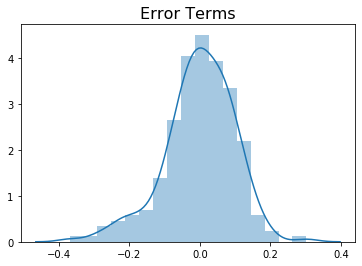

In [91]:
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

In [92]:
print(round(lm.params,3))

const                     0.126
yr                        0.233
holiday                  -0.099
temp                      0.548
windspeed                -0.153
mnth_sep                  0.101
season_summer             0.087
season_winter             0.131
weathersit_Mist+cloudy   -0.080
weathersit_Light snow    -0.284
dtype: float64


The equation of our best fitted line is :
### cnt = 0.126 + (0.233 X yr) - (0.099 X holiday) + (0.548 X temp) - (0.153 X windspeed) + (0.101 X mnth_sep) + (0.087 X season_summer) + (0.131 X season_winter) - (0.08 X weathersit_Mist+cloudy) - (0.284 X weathersit_Light snow).  

* ‘yr’
* ‘temp’
* ‘season_winter’ and ‘season_summer’
As we can see the features are good for linear relationship. The coefficients for these variables are fine.
